# Customer Churn Prediction

This project will be about developing a ML model that predicts the customer churn of a company. I will use the Telco Customer Churn dataset. 

## Library imports.

In [60]:
# Main libraries for data manipulation.
import pandas as pd
import numpy as np          


## Dataset load.

In [61]:
df = pd.read_csv('../data/TelcoCustomerChurn.csv')
print(f'Dataframe created succesfully! \nIt has {df.shape[0]} observartions and {df.shape[1]} features.')
# Displaying the first 5 rows.
df.head()  

Dataframe created succesfully! 
It has 7043 observartions and 21 features.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Preprocessing

I will start by looking for some information about the dataset, such as null values, outliers, features... Based on that info i will make changes or not.

### First Inspection

First, i want to know the basic structure of the dataset.

In [63]:
def basic_info(df):
    """Displaying basic info about the dataset"""
    print("\n BASIC INFO ABOUT THE DATASET")
    print("-" * 40)
    print(f"Dimensions: {df.shape[0]} rows x {df.shape[1]} columns")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n  DATA TYPES:")
    print(df.dtypes.value_counts())
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f'\n COLUMNS:')
    print(f'Object columns: {categorical_cols}')
    print(f'Numerical columns: {numeric_cols}')
    
    print("\n FIRST 5 ROWS:")
    return df.head()

In [64]:
basic_info(df)


 BASIC INFO ABOUT THE DATASET
----------------------------------------
Dimensions: 7043 rows x 21 columns
Memory usage: 6.82 MB

  DATA TYPES:
object     18
int64       2
float64     1
Name: count, dtype: int64

 COLUMNS:
Object columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']

 FIRST 5 ROWS:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


First of all, we know that customerID isn't necessary.

In [65]:
df = df.drop(columns=['customerID'])

### Missing data detection & manipulation

I will continue by checking if there are any missing data on the dataset.

In [66]:
def analyze_missing_data(df):
    """Detailed analysis about null values"""
    print("\n MISSING DATA ANALYSIS")
    print("-" * 40)
    
    # Searching for missing data, count & percentage.
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    # Creating a df with the missing data info.
    missing_df = pd.DataFrame({
        'Column': missing_data.index,
        'Missing_Values': missing_data.values,
        'Percentage': missing_percent.values
    })
    
    # Droping non missing values & sorting values.
    missing_df = missing_df[missing_df['Missing_Values'] > 0].sort_values('Missing_Values', ascending=False)
    
    # Showing the missing data, if it exists.
    if len(missing_df) > 0:
        print(missing_df)
    else:
        print("There are not missing values on the dataset!")
    
    return missing_df

In [67]:
missing_analysis = analyze_missing_data(df)


 MISSING DATA ANALYSIS
----------------------------------------
There are not missing values on the dataset!


### Detecting common data issues.

Identifying common data issues of datasets, like string spaces, duplicates, columns with only one value, impossible values...

In [68]:
def detect_data_issues(df):
    """Detects common data on the dataset."""
    print("\n COMMON ISSUES DETECTING")
    print("-" * 40)
    
    issues = []
    
    # Detecting ' ' values that should be NaN.
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].eq(' ').any():
            count = df[col].eq(' ').sum()
            issues.append(f"'{col}': {count} values are empty spaces.")
            print(f"{col}: {count} values are empty spaces.")
    
    # Detecting duplicates.
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        issues.append(f"Duplicated observations (rows): {duplicates}")
        print(f"{duplicates} rows are duplicated.")
    
    # Detecting columns with only one value.
    for col in df.columns:
        if df[col].nunique() == 1:
            issues.append(f"'{col}': only has an unique value.")
            print(f"{col}: only has an unique value.")
    
    if not issues:
        print("No common issues were detected on the dataset!")
    
    return issues

In [69]:
data_issues = detect_data_issues(df)


 COMMON ISSUES DETECTING
----------------------------------------
TotalCharges: 11 values are empty spaces.
22 rows are duplicated.


### Data Cleansing

With the issues detected, I will do a little preprocess to take out some small problems.

In [70]:
def clean_data(df):
    """ Cleansing & preprocessing the dataset."""
    print(f"\n DATA CLEANING")
    print(f"-"*40)
    
    # Creating a copy of the df to preserve the original one.
    df_clean = df.copy()
    
    # Converting empty spaces to NaN.
    df_clean = df_clean.replace(' ', np.nan)
    df_clean = df_clean.replace('', np.nan)
    
    # Converting some object types to number.
    if 'TotalCharges' in df_clean.columns:
        df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
        nan_count = df_clean['TotalCharges'].isna().sum()
        if nan_count > 0:
            print(f'TotalCharges: {nan_count} values converted to NaN.')
        print(f' {'TotalCharges'} converted to number!')
    
    # Handling other numerical columns that may have problems.
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            # Trying to convert to numerical.
            numeric_series = pd.to_numeric(df_clean[col], errors='coerce')
            # If the conversion was succesful to the mayority of values, then check the NaN.
            if numeric_series.notna().sum() > len(df_clean) * 0.5:
                nan_before = df_clean[col].isna().sum()
                df_clean[col] = numeric_series
                nan_after = df_clean[col].isna().sum()
                if nan_after > nan_before:
                    print(f"⚠️  {col}: {nan_after - nan_before} additional values converted to NaN.")
    
    # Removing duplicates values.
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    removed_duplicates = initial_rows - len(df_clean)
    if removed_duplicates > 0:
        print(f"{removed_duplicates} duplicated values have been removed!.")
    
    # Checking if there are binary categorical columns.
    binary_cols = []
    for col in df_clean.select_dtypes(include=['object']).columns:
        if df_clean[col].nunique() == 2:
            binary_cols.append(col)
    
    # If there are binary cols, changing to numerical.
    if binary_cols:
        print(f"Binary variables detected: {binary_cols}")
        print('Converting the binary colums to numerical...')
        for col in binary_cols:
            df_clean[col] = df_clean[col].map({df_clean[col].unique()[0] : 0,
                                               df_clean[col].unique()[1] : 1})
            print(f'{col} feature converted to numerical succesfully!')
        print(f'\n All binary columns have been converted succesfully!')
        
    # Showing a resume of NaN values after cleansing.
    total_nans = df_clean.isna().sum().sum()
    if total_nans > 0:
        print(f'Total NaN values after cleansing: {total_nans}')
    else:
        print(f'No NaN values exist after the cleansing!')
        
    return df_clean

In [71]:
df_clean = clean_data(df)


 DATA CLEANING
----------------------------------------
TotalCharges: 11 values converted to NaN.
 TotalCharges converted to number!
22 duplicated values have been removed!.
Binary variables detected: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Converting the binary colums to numerical...
gender feature converted to numerical succesfully!
Partner feature converted to numerical succesfully!
Dependents feature converted to numerical succesfully!
PhoneService feature converted to numerical succesfully!
PaperlessBilling feature converted to numerical succesfully!
Churn feature converted to numerical succesfully!

 All binary columns have been converted succesfully!
Total NaN values after cleansing: 11


I know that we have NaN values, I'll handle it further on.

### Univariate Analysis

Looking for a general descriptive analysis.

In [72]:
def univariate_analysis(df):
    """General Univariate Analysis"""
    print(f'\n UNIVARIATE ANALYSIS')
    print(f"-" * 40)
    
    # Selecting the features by their type, as it was done before.
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f'Number of Numerical features: {len(numeric_cols)}')
    print(f'Numerical features: {numeric_cols}')
    print(f'Number of Categorical features: {len(categorical_cols)}')
    print(f'Categorical features: {categorical_cols}')
    
    # Mostramos estadísticas descriptivas.
    if numeric_cols:
        print("\n DESCRIPTIVE STATS - NUMERICAL FEATURES:")
        print(df[numeric_cols].describe().round(2))
    
    # Frecuencias para variables categóricas.
    print(f"\n CATEGORICAL FEATURES DISTRIBUTION:")
    for col in categorical_cols[:5]: # Un número corto para no saturar.
        print(f"\n{col}")
        print(df[col].value_counts())
    return numeric_cols, categorical_cols

In [73]:
numeric_cols, categorical_cols = univariate_analysis(df_clean)


 UNIVARIATE ANALYSIS
----------------------------------------
Number of Numerical features: 10
Numerical features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']
Number of Categorical features: 10
Categorical features: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

 DESCRIPTIVE STATS - NUMERICAL FEATURES:
       gender  SeniorCitizen  Partner  Dependents   tenure  PhoneService  \
count  7021.0        7021.00  7021.00     7021.00  7021.00        7021.0   
mean      0.5           0.16     0.52        0.30    32.47           0.9   
std       0.5           0.37     0.50        0.46    24.53           0.3   
min       0.0           0.00     0.00        0.00     0.00           0.0   
25%       0.0           0.00     0.00        0.00     9.00           1.0   
50%       1.0     

Some distributions are interesting. It will be useful later on.

### Target feature analysis

Doing a short research about the target, the feature "Churn".

In [74]:
def analyze_target_variable(df, target_col='Churn'):
    """Detailed analysis of the target."""
    print(f"\n TARGET ANALYSIS: {target_col}")
    print("-" * 40)
    
    # Checking that it exists.
    if target_col not in df.columns:
        print(f"Columna {target_col} no encontrada.")
        return None
    
    # Target distribution, count and percentage.
    target_counts = df[target_col].value_counts()
    target_props = df[target_col].value_counts(normalize=True) * 100
    
    print(f"{target_col} distribution:")
    for value, count in target_counts.items():
        prop = target_props[value]
        print(f" {value} : {count} ({prop:.1f}$)")
    
    # Detecting unbalance.
    minority_clase_prop = target_props.min()
    if minority_clase_prop < 30:
        print(f"Unbalanced dataset: Minority class = {minority_clase_prop:.1f}%")
    else:
        print(f"Dataset relatively balanced!")
    
    return target_counts, target_props


In [75]:
# In this case, we use the original dataset to see the original values.
target_analysis = analyze_target_variable(df)


 TARGET ANALYSIS: Churn
----------------------------------------
Churn distribution:
 No : 5174 (73.5$)
 Yes : 1869 (26.5$)
Unbalanced dataset: Minority class = 26.5%


Now I know that it exists a data unbalancing issue, that we will have to work on it further on.

### Correlation Analysis

Learning if there is a correlation between the independent features and the target.

In [76]:
def correlation_analysis(df, target_col='Churn'):
    """Correlation analysis"""
    print(f'\n CORRELATION ANALYSIS')
    print(f'-'*40)
    
    # Preparing the data for the correlation.
    df_corr = df.copy()
        
    # Correlation only between numerical variables.
    numeric_df = df_corr.select_dtypes(include=[np.number])
    
    # If there are numerical columns, continue.
    if len(numeric_df.columns) > 1:
        correlations = numeric_df.corr()
        
        # Strong correlations with the target (if it exists and its numerical).
        if target_col in correlations.columns:
            target_corr = correlations[target_col].drop(target_col).sort_values(key=abs, ascending=False)
            print(f"\n Correlaciones más fuertes con {target_col}:")
            print(target_corr.head(10).round(3))
        
        return correlations 
    
    return None 

In [77]:
correlations = correlation_analysis(df_clean)


 CORRELATION ANALYSIS
----------------------------------------

 Correlaciones más fuertes con Churn:
tenure             -0.352
TotalCharges       -0.198
MonthlyCharges      0.195
PaperlessBilling   -0.191
Dependents         -0.163
SeniorCitizen       0.152
Partner             0.149
PhoneService        0.011
gender             -0.009
Name: Churn, dtype: float64


### Outlier detection

Looking for non normal data on the dataset by using interquartilical range (IQR).

In [78]:
def detect_outliers(df, numeric_cols):
    """Detects outliers by using IQR."""
    print(f"\n OUTLIER DETECTION")
    print("-" * 40)
    
    outlier_summary = {}
    
    
    for col in numeric_cols:
        # Veryfing that the column exists and its data is valid.
        if col not in df.columns:
            continue
        # Removing NaN for the outlier calc.
        col_data = df[col].dropna()
        if len(col_data) == 0:
            print(f'{col}: There are no valid data to analyze')
            continue
        
        # Setting up Quantiles & limits.
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Avoiding division by zero.
        if IQR == 0:
            print(f'{col}: It does not have variability (IQR=0)')
            outlier_summary[col] = {
                'count': 0,
                'percentage': 0.0,
                'lower_bound': Q1,
                'upper_bound':Q3
            }
            continue
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR
        
        # Detecting outliers data in a safe way.
        outlier_mask = (col_data < lower_bound) | (col_data > upper_bound)
        outlier_count = outlier_mask.sum()
        outlier_percent = (outlier_count / len(col_data)) * 100
        
        outlier_summary[col] = {
            'count' : outlier_count,
            'percentaje' : outlier_percent,
            'lower_bound' : lower_bound,
            'upper_bound' : upper_bound
        }
        
        # Displaying the info.
        if outlier_count > 0:
            print(f"{col} : {outlier_count} outliers ({outlier_percent:.2f}%)")
        else:
            print(f'{col}: No outliers were detected!')
    
    return outlier_summary

In [79]:
outliers = detect_outliers(df_clean, numeric_cols)


 OUTLIER DETECTION
----------------------------------------
gender: No outliers were detected!
SeniorCitizen: It does not have variability (IQR=0)
Partner: No outliers were detected!
Dependents: No outliers were detected!
tenure: No outliers were detected!
PhoneService: It does not have variability (IQR=0)
PaperlessBilling: No outliers were detected!
MonthlyCharges: No outliers were detected!
TotalCharges: No outliers were detected!
Churn: No outliers were detected!


Looks like there aren't outliers on the dataset.

### Final Summary

The next function will show a short summary of the function developed before.

In [80]:
def summary(df, df_clean, missing_analysis, data_issues):
    """Resumen ejecutivo del análisis"""
    print(f'\n SUMMARY')
    print('-' * 40)
    
    # Dataset info.
    print(f'DATASET')
    print(f'    * Dimensions: {df.shape[0]} rows x {df.shape[1]} columns.')
    print(f'    * Numerical features: {len(df_clean.select_dtypes(include=[np.number]).columns)}')
    print(f'    * Categorical features: {len(df_clean.select_dtypes(include=['object']).columns)}')
    
    # Data quality.
    if len(missing_analysis) == 0:
        print(f'    + Empty values non existent!')
    else:
        print(f'    - {len(missing_analysis)} columns with empty values.')
        
    if len(data_issues) == 0:
        print(f"    + No issues were detected!")
    else:
        print(f'    - {len(data_issues)} issue was detected.')
    
    # Distribution of the target
    if 'Churn' in df_clean.columns:
        churn_rate = (df_clean['Churn'] == 'Yes').mean() * 100
        print(f'\n TARGET:')
        print(f'    * Churn rate: {churn_rate:.1f}%')
    
    if churn_rate < 30:
        print(f'    - Dataset unbalanced! - Consider applying balance techniques (SMOTE, Sinthetic data...)')
    else:
        print(f'    + Dataset balanced!')

In [81]:
summary(df, df_clean, missing_analysis, data_issues)


 SUMMARY
----------------------------------------
DATASET
    * Dimensions: 7043 rows x 20 columns.
    * Numerical features: 10
    * Categorical features: 10
    + Empty values non existent!
    - 2 issue was detected.

 TARGET:
    * Churn rate: 0.0%
    - Dataset unbalanced! - Consider applying balance techniques (SMOTE, Sinthetic data...)


### Saving dataframe

In [82]:
def save_cleaned_data(df_clean, filename='../data/telco_churn_cleaned.csv'):
    """Saving the clean dataset."""
    df_clean.to_csv(filename, index=False)
    print(f'\n Dataset saved succesfully! It was saved on:\n {filename}')
    return filename

In [83]:
save_cleaned_data(df_clean)


 Dataset saved succesfully! It was saved on:
 ../data/telco_churn_cleaned.csv


'../data/telco_churn_cleaned.csv'

Once the EDA (Exploratory Data Analysis) is done and I have all the information needed to make decisions, all the problems detected before will be fixed.

## EDA & Visualizations

As I said before, I'm doing the Exploratory Data Analysis to make some changes on the issues found on the dataset.

In [84]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt 
import seaborn as sns  
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Visual configuration.
plt.style.use('default')
sns.set_palette('husl')

# Colors configuration, they were taken from internet.
COLORS = {
    'primary': '#2E86AB',      # Corporative Blue
    'secondary': '#A23B72',    # Pink
    'accent': '#F18F01',       # Orange
    'success': '#C73E1D',      # Red
    'background': '#F5F5F5',   # Light gray
    'churn_yes': '#E74C3C',    # Red (Churn)
    'churn_no': '#27AE60'      # Green (No Churn)
}

# Global configuration
plt.rcParams.update({
    'figure.figsize': (15,8),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize':12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

print(f'Configuration set succesfully!')

Configuration set succesfully!


### Overview

First, I'll start by showing some key metrics that will display important data.

In [86]:
def overview_dashboard(df):
    """Overview dashboard with key metrics."""
    print(f'Creating overview dashboard...')
    
    # Characteristics of the plot.
    fig = plt.figure(figsize=(18,16))
    gs = fig.add_gridspec(3,4, hspace=0.3, wspace=0.3)
    
    # Main title.
    fig.suptitle('CUSTOMER CHURN - OVERVIEW DASHBOARD - EXECUTIVE DASHBOARD',
                 fontsize=24, fontweight='bold', y=0.95)
    
    # 1. KPIs. Cards display.
    
    # Setting up KPIs.
    churn_rate = (df['Churn'] == 1).mean()*100
    avg_month_ch = df['MonthlyCharges'].mean()
    avg_tenure = df['tenure'].mean()
    
    # Exceptions
    '''
    (df['Churn']== 'Yes').mean()*100:.1f%
    df['MonthlyCharges'].mean():.0f%
    df['tenure'].mean():.1f%
    '''
    # Colors with KPIS.
    kpis = [
        ('Total Customers', len(df), '#2E86AB'),
        ('Churn Rate', f'{churn_rate:.1f}%', '#E74C3C'),
        ('Average Monthly Charges', f"${avg_month_ch:.0f}",'#F18F01'),
        ('Average Tenure', f'{avg_tenure:.1f} months', '#27AE60')
    ]
    
    # Displaying the KPIs.
    for i, (title, value, color) in enumerate(kpis):
        ax = fig.add_subplot(gs[0, i])
        ax.text(0.5, 0.7, str(value), ha='center', va='center',
                fontsize=32, fontweight='bold', color=color)
        ax.text(0.5, 0.3, title, ha='center', va='center',
                fontsize=14, color='gray')
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.axis('off')
        
        # Adding border.
        rect = Rectangle((0.05, 0.05), 0.9, 0.9, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
    
    # 2. Churn Distribution. Pie graph.
    ax1 = fig.add_subplot(gs[1, :2])
    churn_counts = df['Churn'].value_counts()
    colors = [COLORS['churn_no'], COLORS['churn_yes']]
    wedges, text, autotexts = ax1.pie(churn_counts.values, labels=churn_counts.index, colors = colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 12})
    ax1.set_title('Customer Churn Distribution', fontsize=16, fontweight='bold', pad=20)
    
    # 3. Churn by Contract type. Bar graph.
    ax2 = fig.add_subplot(gs[1, 2:])
    contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
    contract_churn.plot(kind='bar', ax=ax2, color=[COLORS['churn_no'], COLORS['churn_yes']])
    ax2.set_title('Churn Rate by Contract Type', fontsize=16, fontweight='bold')
    ax2.set_ylabel('Churn Rate %')
    ax2.set_xlabel('Contract Type')
    ax2.legend(['No Churn','Churn'])
    ax2.tick_params(axis='x', rotation=45)
    
    # 4. Monthly Charges distribution. Histogram.
    ax3 = fig.add_subplot(gs[2,:2])
    for churn in [0, 1]:
        data = df[df['Churn'] == churn]['MonthlyCharges']
        color = COLORS['churn_no'] if churn == 0 else COLORS['churn_yes']
        ax3.hist(data, alpha=0.7, label=f'Churn {churn}', bins=30, color=color)
    ax3.set_title('Monthly Charges Distribution by Churn', fontsize=16, fontweight='bold')
    ax3.set_xlabel('Monthly Charges $')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    
    # 5. Tenure vs Monthly Charges. Scatter plot.
    ax4 = fig.add_subplot(gs[2, 2:])
    for churn in [0, 1]:
        data = df[df['Churn'] == churn]
        color = COLORS['churn_no'] if churn == 0 else COLORS['churn_yes']
        ax4.scatter(data['tenure'], data['MonthlyCharges'], alpha=0.6, label=f'Churn: {churn}', color=color, s=20)
    ax4.set_title('Tenure vs Monthly Charges', fontsize=16, fontweight='bold')
    ax4.set_xlabel('Tenure (months)')
    ax4.set_ylabel('Monthly Charges $')
    ax4.legend()
    
    # Showing the plots.
    plt.tight_layout()
    plt.show()
        
    

Creating overview dashboard...


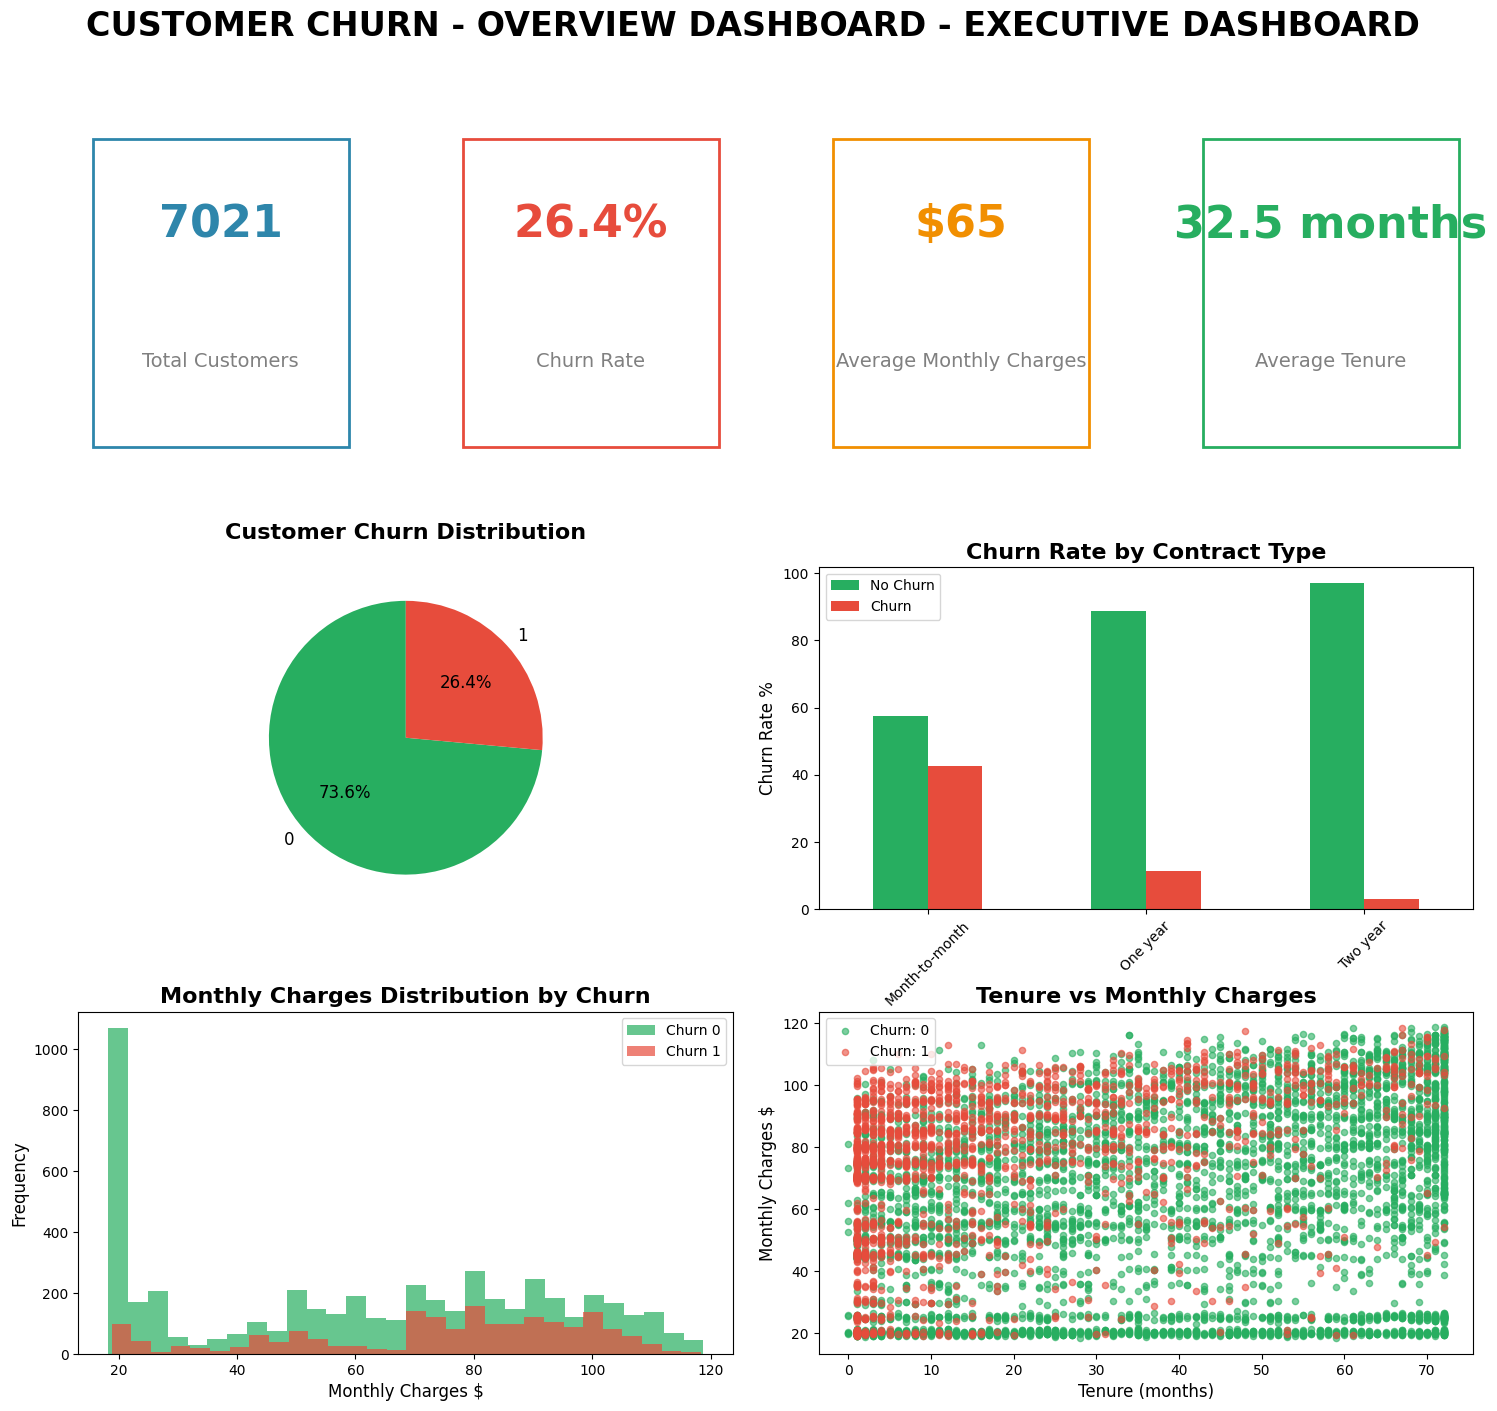

In [87]:
overview_dashboard(df_clean)


Several conclusions can be drawn from this first graph. One of them is that people tend to churn the first months with the company. Most people don't leave the service if they have longer contracts. It could be either that they don't leave because of longer contracts or they sign a longer contract due to the fact that they don't want to leave. Either way, it's good to know.

Continuing with the next graph, people with less monthly charges tend to give up on the service. This could be because the majority of the people that leave are people with less monetary resources and they can't afford a service that they think isn't worthy in quality-price ratio perspective. It's a hypothesis.

Last graph shows the relation between monthly charges and tenure. People churn in the first months of contract, independently of the monthly charges. When the tenure is longer, most people that churn are the one that have higher charges, whick makes sense.

From the KPIs, we can take great facts about the company, like the average tenure is 32 months. It is a positive data about a service company. The average charges in a month are 65$, which could show if the company is expensive or not. To say this, we need a most deep search on the market to compare prices and services with competitors.

### Bivariate Analysis

I will continue with the impact of the different categorical features on the churn rate.

In [88]:
def bivariate_analysis(df):
    """Bivariate analysis with categorical features."""
    print(f'Creating bivariate analysis...')
    
    # Selecting important categorical features.
    imp_cat_cols = ['gender','SeniorCitizen','Partnet','Dependents','PhoneService','InternetService',
                    'Contract','PaymentMethod']
    
    # Checking that the columns are available.
    av_cols = [col for col in imp_cat_cols if col in df.columns]
    
    n_cols = 4
    n_rows = (len(av_cols) + n_cols - 1) // n_cols 
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,5*n_rows))
    fig.suptitle('CHURN ANALYSIS BY CUSTOMERS ASPECTS', fontsize=20, fontweight='bold')
    
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes       
    
    for i, col in enumerate(av_cols):
        ax = axes[i]
        
        # Creating percentage crosstab.
        ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
        
        # Clustered bar chart.
        ct.plot(kind='bar', ax=ax, color=[COLORS['churn_no'], COLORS['churn_yes']])
        ax.set_title(f'Churn Rate by {col.replace("_", " ").title()}', fontweight='bold', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Churn Rate %')
        ax.legend(['No Churn','Churn'], loc='upper right')
        ax.tick_params(axis='x', rotation=45)
        
        # Adding values to the bars.
        for cont in ax.containers:
            ax.bar_label(cont, fmt='%.1f%%', fontsize=9)
    
    # If the subplot is empty, hide it.
    for i in range(len(av_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

Creating bivariate analysis...


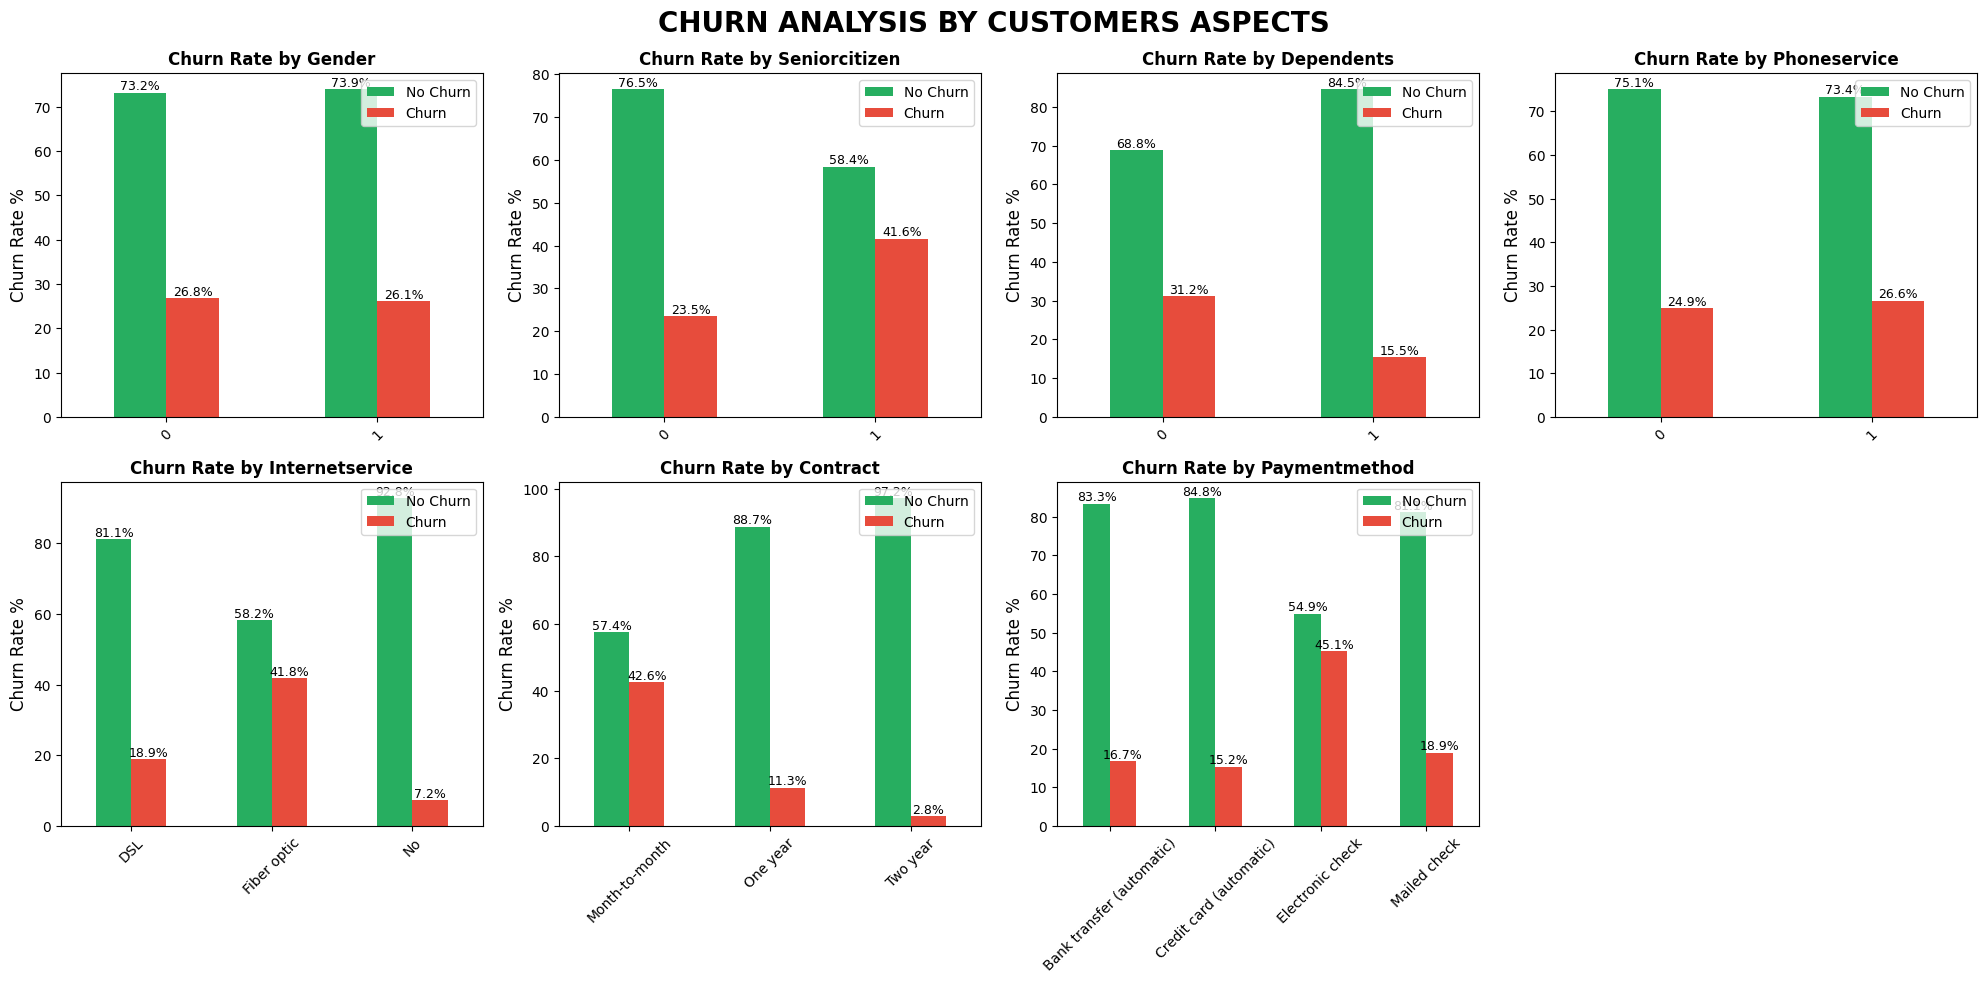

In [89]:
bivariate_analysis(df_clean)

More conclusions to take away from this chart. First, churn rate is almost the same in males and females, so it will be a variable that shouldn't matter. Same material with the phone service, it doesnt make a difference, eventhough the diference is a slightly larger.

Continuing with the senior citizen feature, one can see that senior citizens clearly churn almost the double that non senior citizens. That's an important feature to watch. Same happens with people that have dependents. People without dependents tend to churn double than people without dependants. 

As we have seen on the charts before, people with shorter contracts tend to be the majority of churns of the company. That's normal, because it probably has a cost to break a longer contract. 

Based on intenet service, the company has an important loss of the clients with fiber optic. That service must be one to watch to make the company grow.

Finally, on the payment method, we can clearly see that the most customers that churn use electronic check. 

### Advanced Correlation Analysis

This will show more important info about the relation of the features with the target.

In [90]:
cat_cols = df_clean.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f'Unique values on {col}: {df_clean[col].unique()}')

Unique values on MultipleLines: ['No phone service' 'No' 'Yes']
Unique values on InternetService: ['DSL' 'Fiber optic' 'No']
Unique values on OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values on OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values on DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values on TechSupport: ['No' 'Yes' 'No internet service']
Unique values on StreamingTV: ['No' 'Yes' 'No internet service']
Unique values on StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values on Contract: ['Month-to-month' 'One year' 'Two year']
Unique values on PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [91]:
def correlation_analysis(df):
    """Correlation Heatmap."""
    print(f'Creating Correlation Heatmap...')
    
    # Preparing data.
    df_corr = df.copy()
    
    # Converting categorical features with 3 or 4 unique values.
    binary_mapping = {}
    for col in df_corr.select_dtypes(include=['object']).columns:
        unique_values = df_corr[col].dropna().unique()
        if len(unique_values) == 4:
            binary_mapping[col] = {unique_values[0]: 0, unique_values[1]: 1, unique_values[2]:2, unique_values[3]:3}
            df_corr[col] = df_corr[col].map(binary_mapping[col])
        elif len(unique_values) == 3:
            binary_mapping[col] = {unique_values[0]: 0, unique_values[1]: 1, unique_values[2]:2}
            df_corr[col] = df_corr[col].map(binary_mapping[col])
    
    # Taking only numerical values.
    num_df = df_corr.select_dtypes(include=[np.number])
    
    # Setting a minimun feature number.
    if len(num_df.columns) < 2:
        print(f'Insufficient numerical values for the correlation.')
        return
    
    # Calculating correlation.
    corr_matrix = num_df.corr()
    
    # Creating mask for the upper triangle of the matrix.
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Configurating the chart.
    fig, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r',center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=ax)
    ax.set_title('CORRELATION MATRIX', fontsize=16, fontweight='bold', pad=20)
    
    # Display.
    plt.tight_layout()
    plt.show()
                 

Creating Correlation Heatmap...


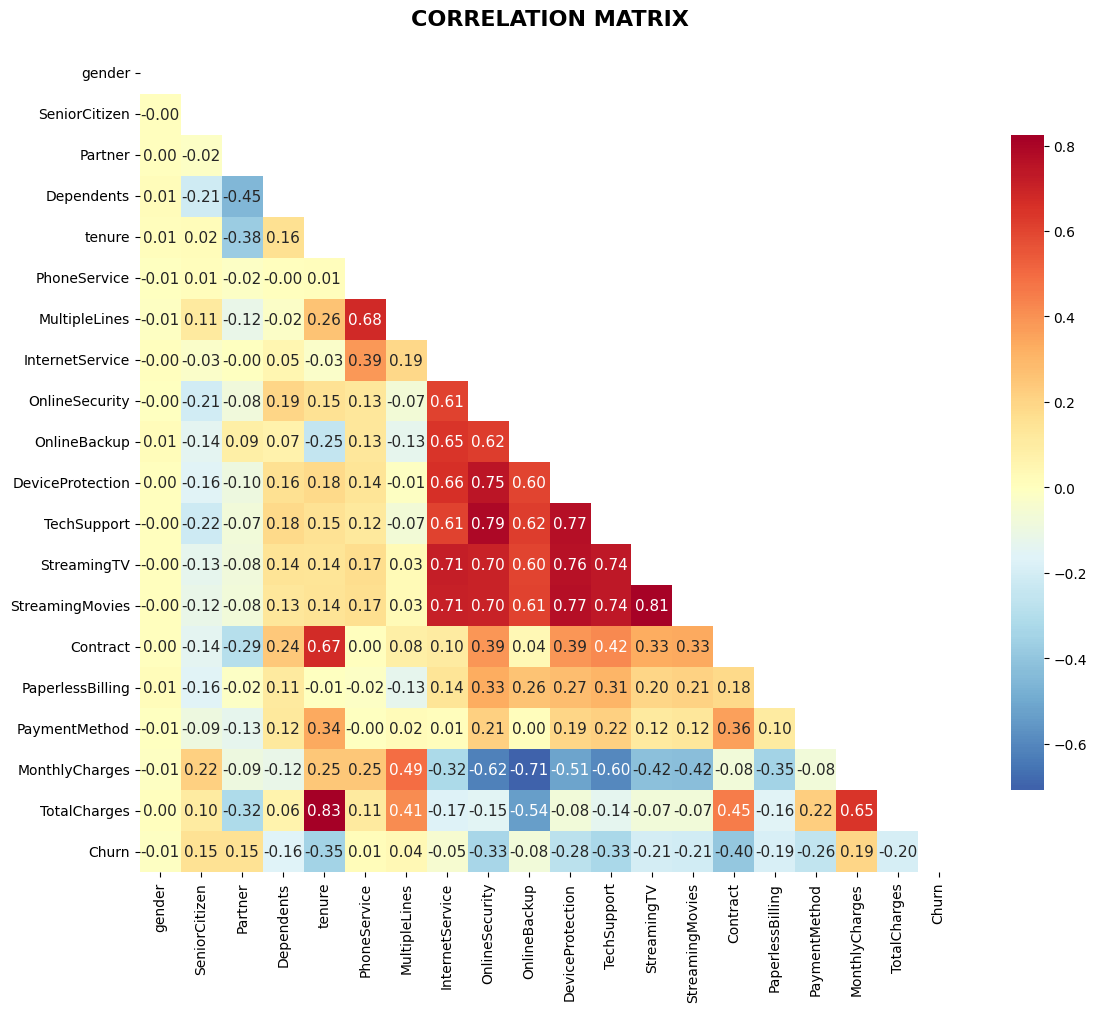

In [92]:
correlation_analysis(df_clean)

Watching the last row of the correlation matrix, we see again that the contract duration and tenure are the most influential variables in the churn decision. New less influential variables are online security and tech support.

### Tenure Analysis

To companys that provide a time paymenth service, whether is a month-to month, trimestral or yearly, the most important thing is the customer tenure. Although it's common knowledge, the charts confirm it aswell.

Therefore, i will do an analysis to the ternure feature to make customer retention insights.

In [93]:
def tenure_analysis(df):
    """Detailed analysis of the tenure feature."""
    print(f'Creating tenure analysis...')
    
    fig, axes = plt.subplots(2,2, figsize=(16,12))
    fig.suptitle('CUSTOMER TENURE ANALYSIS', fontweight='bold', fontsize=18)
    
    # Tenure distribution based on churn.
    ax1 = axes[0,0]
    for churn in [0,1]:
        data = df[df['Churn'] == churn]['tenure']
        color = COLORS['churn_no'] if churn == 0 else COLORS['churn_yes']
        ax1.hist(data, alpha=0.7, label=f'Churn: {churn}', bins=30, color=color)
    ax1.set_title('Tenure Distribution by Churn Status', fontweight='bold')
    ax1.set_xlabel('Tenure (Months)')
    ax1.set_ylabel('Number of Customers')
    ax1.legend()
    
    # Churn rate by tenure segments.
    ax2 = axes[0,1]
    # Creating segments.
    df['TenureSegment'] = pd.cut(df['tenure'], bins=[0,12,24,48,100], labels=['0-12m','12-24m','24-40m','48+'])
    tenure_churn = df.groupby('TenureSegment')['Churn'].apply(lambda x: (x == 1).mean() * 100)
    bars = ax2.bar(tenure_churn.index, tenure_churn.values, color=COLORS['churn_yes'], alpha=0.8)
    ax2.set_title('Churn Rate by Tenure Segments', fontweight='bold')
    ax2.set_ylabel('Churn Rate %')
    ax2.set_xlabel('Tenure Segments')
    # Adding values to the bars.
    for b in bars:
        height = b.get_height()
        ax2.text(b.get_x() + b.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Monthly Charges vs Tenure (advanced).
    ax3 = axes[1,0]
    scatter = ax3.scatter(df['tenure'], df['MonthlyCharges'], c=df['Churn'], cmap='RdYlGn_r', alpha=0.6)
    ax3.set_title('Monthly Charges vs Tenure', fontweight='bold')
    ax3.set_xlabel('Tenure (Months)')
    ax3.set_ylabel('Monthly Charges ($)')
    # Adding colorbar.
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Churn (0:No, 1=Yes)')
    
    # Cohort Simplified Analysis.
    ax4 = axes[1,1]
    # Creating more bins for cohort.
    df['TenureBin'] = pd.cut(df['tenure'], bins=12, precision=0)
    cohort_churn = df.groupby('TenureBin')['Churn'].apply(lambda x: (x == 1).mean() * 100)
    # Configurating the plot.
    ax4.plot(range(len(cohort_churn)), cohort_churn.values, marker='o', linewidth=3, markersize=8, color=COLORS['churn_yes'])
    ax4.set_title('Churn Rate by Tenure Cohorts', fontweight='bold')
    ax4.set_ylabel('Churn Rate (%)')
    ax4.set_xlabel('Tenure Cohort')
    ax4.grid(True, alpha=0.3)
    
    # Plot.
    plt.tight_layout()
    plt.show()

Creating tenure analysis...


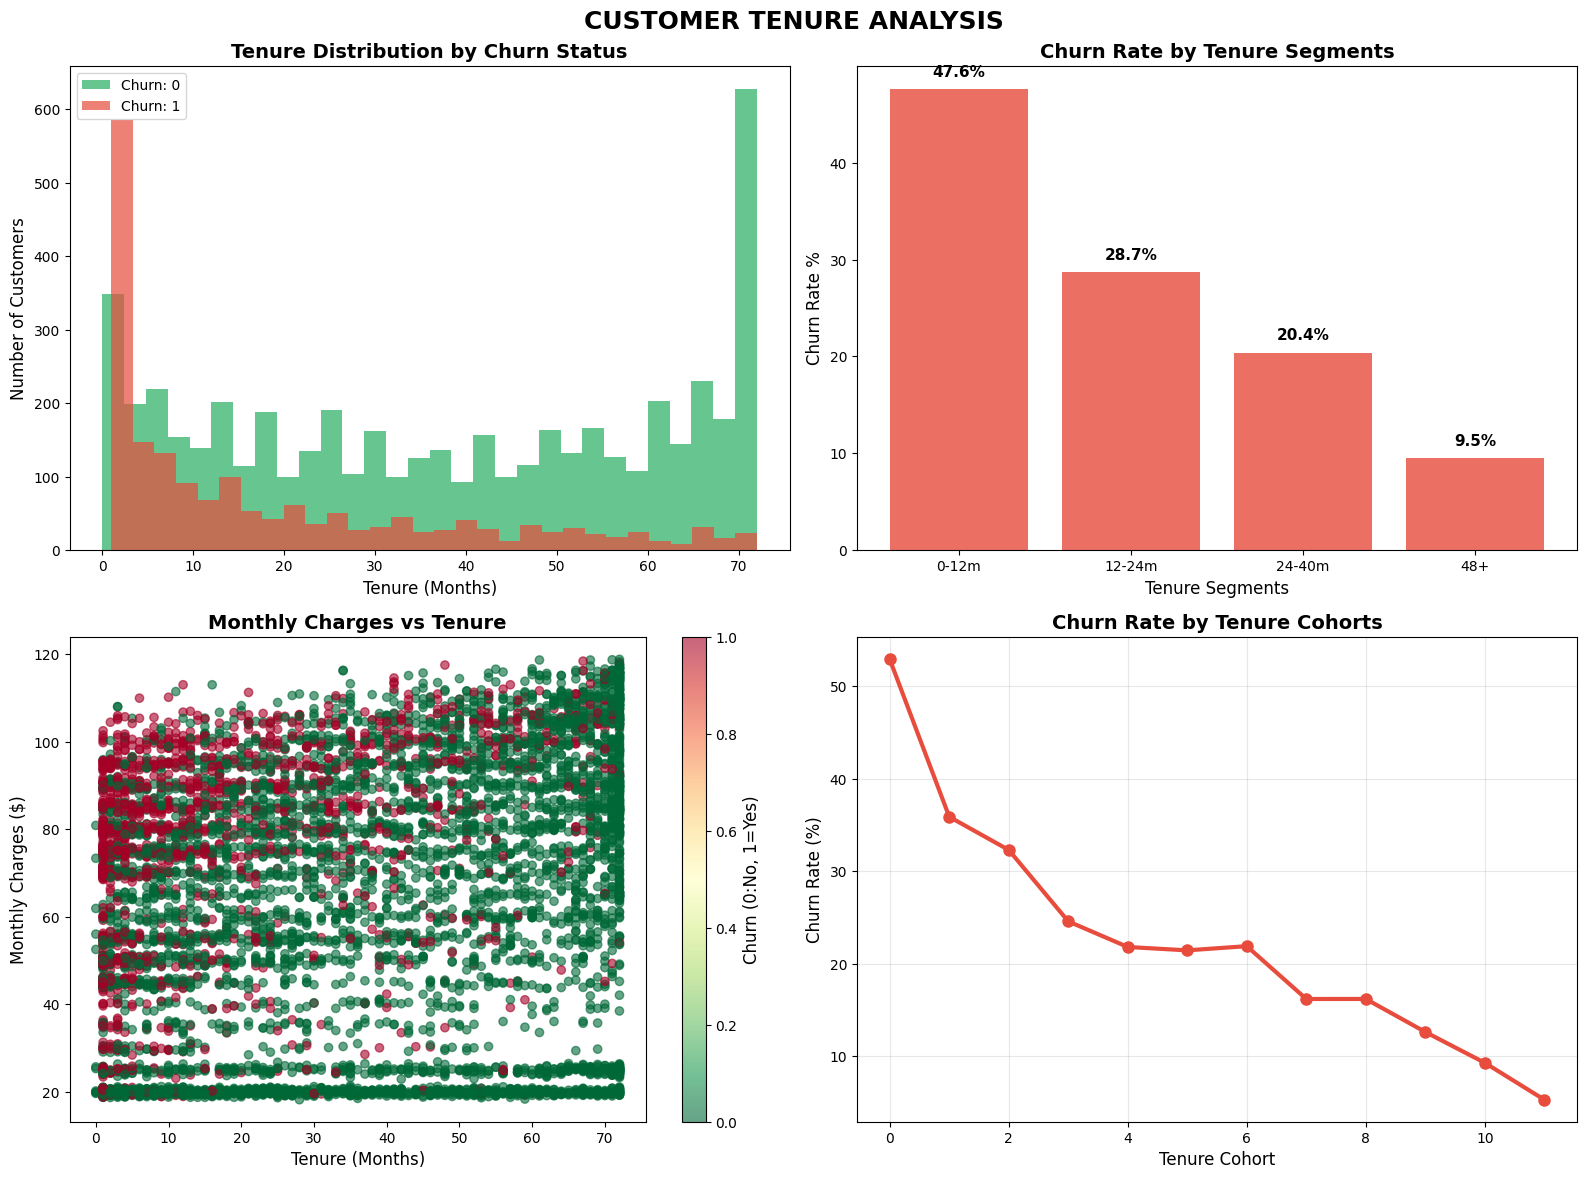

In [94]:
tenure_analysis(df_clean)

### Financial Analysis

As we continue, one of the key things that companys have to check are finantial issues. The main focus of a company is make benefits, therefore I will do a research of the finantial section based on churn.

In [95]:
def financial_analysis(df):
    """Churn Impact Analysis"""
    print(f'Creating Financial Analysis...')
    
    # Figures order.
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('FINANCIAL IMPACT ANALYSIS - BUSINESS INTELLIGENCE', 
                fontsize=18, fontweight='bold')
    
    # Revenue Distribution
    ax1 = axes[0, 0]
    monthly_revenue = df.groupby('Churn')['MonthlyCharges'].sum()
    colors = [COLORS['churn_no'], COLORS['churn_yes']]
    bars = ax1.bar(monthly_revenue.index, monthly_revenue.values, color=colors)
    ax1.set_title('Monthly Revenue by Churn Status', fontweight='bold')
    ax1.set_ylabel('Total Monthly Revenue ($)')
    # Adding values to the bars.
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')
        
    # Average Revenue per User.
    ax2 = axes[0, 1]
    arpu = df.groupby('Churn')['MonthlyCharges'].mean()
    bars = ax2.bar(arpu.index, arpu.values, color=colors)
    ax2.set_title('Average Revenue Per User (ARPU)', fontweight='bold')
    ax2.set_ylabel('ARPU ($)')
    # Adding values.
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${height:.0f}', ha='center', va='bottom', fontweight='bold')
    
    # Customer lifetime estimation.
    ax3 = axes[1, 0]
    # CLE = Monthly Charges * Tenure
    df['EstimatedCLV'] = df['MonthlyCharges'] * df['tenure']
    clv_by_churn = df.groupby('Churn')['EstimatedCLV'].mean()
    bars = ax3.bar(clv_by_churn.index, clv_by_churn.values, color=colors)
    ax3.set_title('Estimated Customer Lifetime Value', fontweight='bold')
    ax3.set_ylabel('CLV ($)')
    # Adding values.
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

    # 4. Revenue at Risk (Annual)
    ax4 = axes[1, 1]
    churn_customers = df[df['Churn'] == 1]
    revenue_at_risk = churn_customers['MonthlyCharges'].sum() * 12  
    retained_revenue = df[df['Churn'] == 0]['MonthlyCharges'].sum() * 12
    
    risk_data = [retained_revenue, revenue_at_risk]
    risk_labels = ['Retained Revenue', 'Revenue at Risk']
    colors_risk = [COLORS['churn_no'], COLORS['churn_yes']]
    
    wedges, texts, autotexts = ax4.pie(risk_data, labels=risk_labels, 
                                      colors=colors_risk, autopct='%1.1f%%',
                                      startangle=90)
    ax4.set_title('Annual Revenue at Risk', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Showing financial insights.
    print("\ FINANCIAL INSIGHTS:")
    print("-" * 40)
    print(f"Annual Revenue at Risk: ${revenue_at_risk:,.0f}")
    print(f"Average CLV (Retained): ${clv_by_churn[0]:,.0f}")
    print(f"Average CLV (Churned): ${clv_by_churn[1]:,.0f}")
    print(f"CLV Difference: ${clv_by_churn[0] - clv_by_churn[1]:,.0f}")

Creating Financial Analysis...


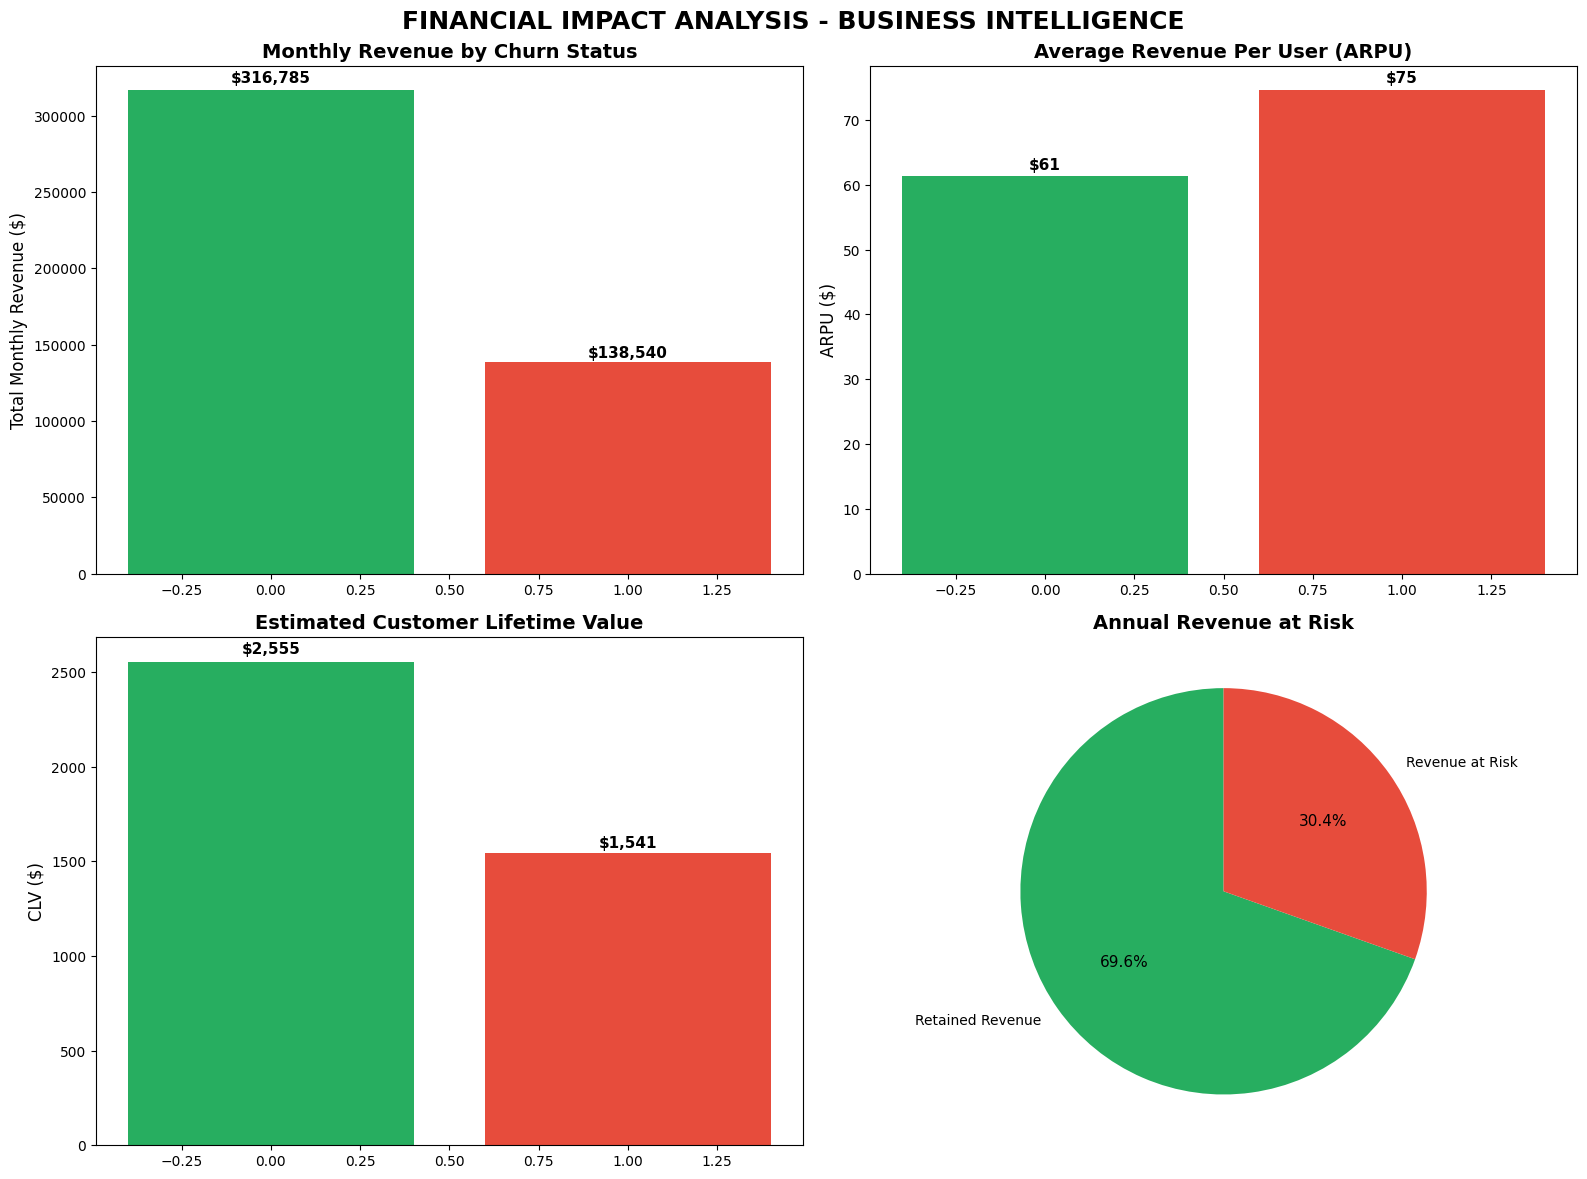

\ FINANCIAL INSIGHTS:
----------------------------------------
Annual Revenue at Risk: $1,662,482
Average CLV (Retained): $2,555
Average CLV (Churned): $1,541
CLV Difference: $1,013


In [96]:
financial_analysis(df_clean)

It was said before, and this charts reflect it, the main focus of a service company is the tenure of the customer. It can be seen in the first and third chart. Firstly, the monthly incomes are higher for customers that don't churn. In the third chart, the customer lifetime value is higher for customers that don't churn, whick makes sense too. The longer the customer has a contract with the company, the more benefits the company generate.

The second chart displays that the monthly revenue is higher from people that churn. That could be one of the reason why they churn, due to more expensive contracts. It's an interesting fact.

Finally, the annual revenue reveal that there's a 30% of revenue at risk. This could be a big or low number depending on the company perspective. But the lower it is, the better.

### Services Analysis

To conclude the EDA, i'm going to analyse the different services that the company provides, searching for key information about them.

In [97]:
def service_analysis(df):
    """Contracts Services Analysis"""
    print(f'Creating service analysis...')
    
    # Identify service features.
    service_cols = [col for col in df.columns if col in ['PhoneService', 'MultipleLines', 'InternetService', 
                          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']]
    
    # Minimun services.
    if len(service_cols) < 3:
        print("Not enought service features to analyse.")
        return
    
    # Plot structure.
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('SERVICE ANALYSIS - PRODUCT STRATEGY', fontsize=18, fontweight='bold')
    
    # Adoption Rate per service.
    ax1 = axes[0, 0]
    adoption_rates = {}
    for service in service_cols:
        if service in df.columns:
            # Adoption rate calc.
            if service == 'PhoneService' or 'InternetService':
                valid_responses = df[df[service] != 'No'][service]
            else:
                valid_responses = df[df[service] != 'No internet service'][service]
            if len(valid_responses) > 0:
                adoption_rate = (valid_responses == 'Yes').mean() * 100
                adoption_rates[service] = adoption_rate
    
    if adoption_rates:
        bars = ax1.bar(range(len(adoption_rates)), list(adoption_rates.values()), 
                      color=COLORS['primary'])
        ax1.set_title('Service Adoption Rates', fontweight='bold')
        ax1.set_ylabel('Adoption Rate (%)')
        ax1.set_xticks(range(len(adoption_rates)))
        ax1.set_xticklabels(list(adoption_rates.keys()), rotation=45, ha='right')
        # Adding values.
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom')
        
    # 2. Churn rate by Internet type.
    ax2 = axes[0, 1]
    if 'InternetService' in df.columns:
        internet_churn = df.groupby('InternetService')['Churn'].apply(
            lambda x: (x == 1).mean() * 100)
        bars = ax2.bar(internet_churn.index, internet_churn.values, 
                      color=COLORS['secondary'])
        ax2.set_title('Churn Rate by Internet Service Type', fontweight='bold')
        ax2.set_ylabel('Churn Rate (%)')
        ax2.tick_params(axis='x', rotation=45)
        
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom')
    
    # Number of Service by Churn.
    ax3 = axes[1, 0]
    # Contar servicios por cliente
    service_count = df[service_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)
    df_temp = df.copy()
    df_temp['ServiceCount'] = service_count
    
    service_churn = df_temp.groupby('ServiceCount')['Churn'].apply(
        lambda x: (x == 1).mean() * 100)
    
    ax3.plot(service_churn.index, service_churn.values, 
             marker='o', linewidth=3, markersize=8, color=COLORS['accent'])
    ax3.set_title('Churn Rate vs Number of Services', fontweight='bold')
    ax3.set_xlabel('Number of Services')
    ax3.set_ylabel('Churn Rate (%)')
    ax3.grid(True, alpha=0.3)
    
    # 4. Revenue per Service Bundle
    ax4 = axes[1, 1]
    avg_revenue = df_temp.groupby('ServiceCount')['MonthlyCharges'].mean()
    bars = ax4.bar(avg_revenue.index, avg_revenue.values, color=COLORS['success'])
    ax4.set_title('Average Revenue by Service Count', fontweight='bold')
    ax4.set_xlabel('Number of Services')
    ax4.set_ylabel('Average Monthly Revenue ($)')
    
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'${height:.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

Creating service analysis...


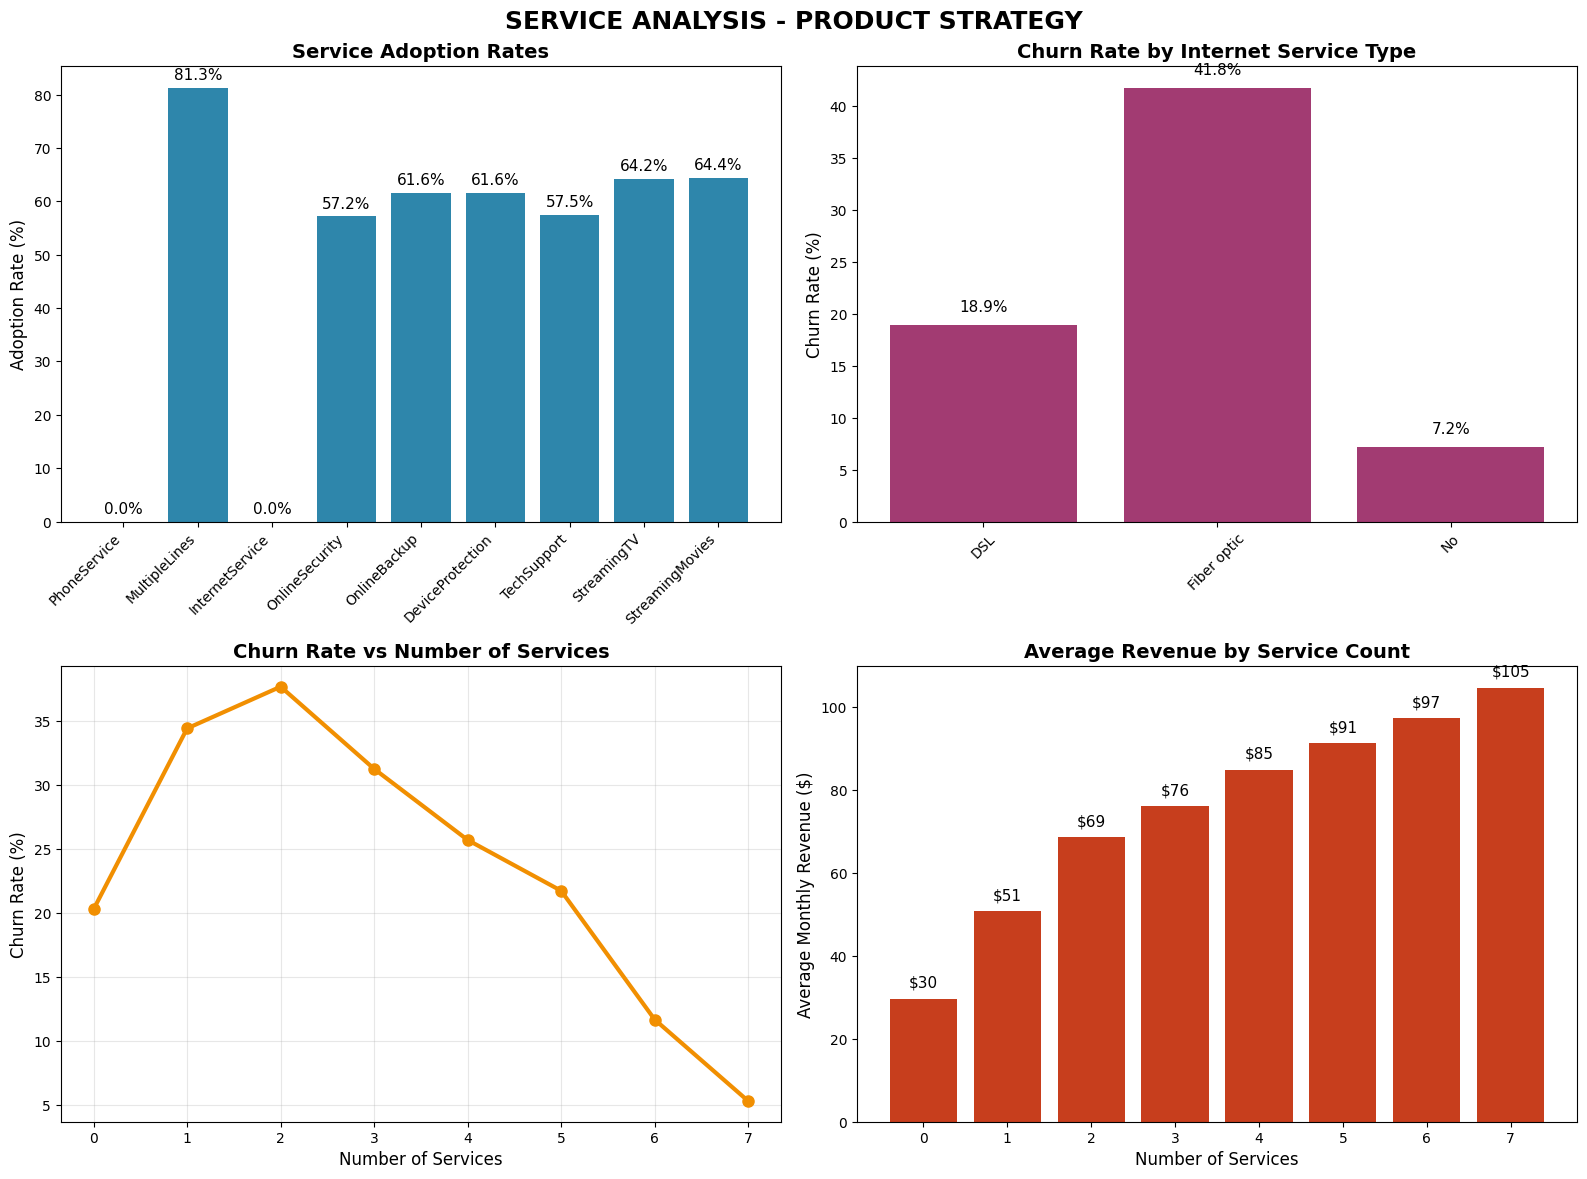

In [98]:
service_analysis(df_clean)

First chart shows that every service is contracted by atleast 57% of the customers, which is a very good signal for the company.

Second chart displays that the internet service with more churn rate is the fiber optic. This could mean a problem for the company if it's a question of the quality of the fiber optic. On the other hand, it could be that there are many more fiber optic contracts than the DSL, which could unbalance the chart.

Third chart reveals that the churn rate is lower whether the more services are contracted by customers. 

Four chart reflect something that should be obvious, the more services that a customer has contracted, the more revenue should generate on the company.

After this EDA, i've learnt a lot of information from the dataset, and i'm going to continue doing a feature engineering to create some ratios & features to try to develop the perfecto model for this dataset.

## Feature Engineering

I will create some variables that the model could use to make better predictions. First, i have to prepare the data.

In [99]:
def preparing_features(df):
    """Initial preparation & cleansing."""
    print(f' PREPARING BASE FEATURES...')
    print('-'*40)
    
    # Copying the dataset to preserve the original.
    df_fe = df.copy()
    
    # Handling Nan values detected before.
    if df_fe['TotalCharges'].isna().sum() > 0:
        # Imputing with the value obtained by tenure*month_charges por new clients.
        missing_mask = df_fe['TotalCharges'].isna()
        df_fe.loc[missing_mask, 'TotalCharges'] = (df_fe.loc[missing_mask, 'tenure'] * df_fe.loc[missing_mask, 'MonthlyCharges'])
        print(f'{missing_mask.sum()} missing values imputed succesfully on TotalCharges!')
    
    # Converting SeniorCitizen back to binary categorical.
    # if 'SeniorCitizen' in df_fe.columns:
    #     df_fe['SeniorCitizen'] = df_fe['SeniorCitizen'].map({0:'No', 1:'Yes'})
    #     print('SeniorCitizen converted succesfully!')
    
    # Standarizing categorical values by removing their spaces.
    cat_cols = df_fe.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df_fe[col] = df_fe[col].str.strip()
    
    print(f'Dataset prepared: {df_fe.shape[0]} rows x {df_fe.shape[1]} columns.')
    return df_fe 

In [100]:
# preparing_features(df_clean)

The first features created will be financial. The features will be similar to the one showed on the charts before.

In [101]:
def financial_features(df):
    """Creating advanced finantial features"""
    print(f'CREATING FINANTIAL FEATURES...')
    print('-'*40)
    
    # Preserving first df.
    df_new = df.copy()
    
    # 1 - Estimated Customer Lifetime Value.
    df_new['EstimatedCLV'] = df_new['tenure'] * df_new['MonthlyCharges']
    
    # 2 - Monthly Charges vs Tenure Ratio.
    df_new['MonthlyCharges_per_Tenure'] = df_new['MonthlyCharges'] / (df_new['tenure'] + 1) # Avoiding division by zero.
    
    # 3 - Expected Total Charges vs Real Total Charges. This way i can detect discounts.
    df_new['Expected_TotalCharges'] = df_new['tenure'] * df_new['MonthlyCharges']
    df_new['Charges_Difference'] = df_new['TotalCharges'] - df_new['Expected_TotalCharges']
    df_new['Charges_Ratio'] = df_new['TotalCharges'] / (df_new['Expected_TotalCharges'] + 1)
    
    # 4 - Dividing customers by its value based on their expenses.
    monthly_quartiles = df_new['MonthlyCharges'].quantile([0.33, 0.66])
    df_new['CustomerValue'] = pd.cut(df_new['MonthlyCharges'], bins=[0, monthly_quartiles[0.33], monthly_quartiles[0.66], np.inf],labels=['Low_Value', 'Medium_Value', 'High_Value'])
    
    # 5 - Spending trends (Made by Monthly Charges vs Tenure Mean ratio)
    avg_charges_by_tenure = df_new.groupby('tenure')['MonthlyCharges'].mean()
    df_new['Charges_vs_Tenure_Avg'] = df_new.apply(lambda row: row['MonthlyCharges'] - avg_charges_by_tenure.get(row['tenure'], row['MonthlyCharges']), axis=1)
    
    # 6 - Revenue per service
    service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
    # Checking every column.
    av_services = [col for col in service_cols if col in df_new.columns]
    if av_services:
        # Counting active services.
        df_new['Active_Services'] = df_new[av_services].apply(lambda row:sum(1 for val in row if val == 'Yes'), axis = 1)
        df_new['Revenue_per_Service'] = df_new['MonthlyCharges'] / (df_new['Active_Services'] + 1)
    
    print(f'{len([col for col in df_new.columns if col not in df.columns])} finantial features created!')
    return df_new 
    
    

In [102]:
# financial_features(df_clean)

This variables will improve the performance of the model. I'm going to continue with the engagement features below to predict customer retention.

In [103]:
def engagement_features(df):
    """Developing engagement & customer satisfaction features."""
    print(f'\n CREATING ENGAGEMENT FEATURES...')
    print('-'*40)
    
    df_new = df.copy()
    
    # 1 - Premium Services Adoption Score.
    premium_services = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']
    available_premium = [col for col in premium_services if col in df_new.columns]
    # Counting premium services with Yes.
    if available_premium:
        df_new['Premium_Services_Score'] = df_new[available_premium].apply(lambda row: sum(1 for val in row if val == 'Yes'), axis=1)
        
    # 2 - Entertainment services score.
    entertainment_services = ['StreamingTV','StreamingMovies']
    available_enter = [col for col in entertainment_services if col in df_new.columns]
    # Counting entertainment services.
    if available_enter:
        df_new['Entertainment_Services_Score'] = df_new[available_enter].apply(lambda row: sum(1 for val in row if val == 'Yes'), axis=1)
    
    # 3 - Internet dependency score.
    if 'InternetService' in df_new.columns:
        df_new['Has_Internet'] = (df_new['InternetService'] != 'No').astype(int)
        # Services that require internet.
        internet_dependant = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
        av_int_dep = [col for col in internet_dependant if col in df_new.columns]
        # Counting internet dependencies.
        if av_int_dep:
            df_new['Internet_Services_Count'] = df_new[av_int_dep].apply(lambda row: sum(1 for val in row if val == 'Yes'), axis=1)
            
    # 4 - Service bundle completeness.
    if 'Active_Services' in df_new.columns:
        max_services = df_new['Active_Services'].max()
        df_new['Service_Completeness'] = df_new['Active_Services'] / max_services 
    
    # 5 - Payment behaviour indicators. Manual vs Automatic.
    if 'PaymentMethod' in df_new.columns:
        # Manual.
        manual_payments = ['Electronic check', 'Mailed check']
        df_new['Manual_Payment'] = df_new['PaymentMethod'].isin(manual_payments).astype(int)
        # Automatic.
        auto_payment = ['Bank transfer (automatic)', 'Credit card (automatic)']
    
    # 6 - Digital engagement score.
    digital_indicators = []
    
    if 'PaperlessBilling' in df_new.columns:
        df_new['PaperlessBilling'] = (df_new['PaperlessBilling'] == 'Yes').astype(int)
        digital_indicators.append('PaperlessBilling')
        
    electronic_payments = ['Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
    df_new['Electronic_Payment'] = df_new['PaymentMethod'].isin(electronic_payments).astype(int)

    if 'Electronic_Payment' in df_new.columns:
        digital_indicators.append('Electronic_Payment')
        
    if digital_indicators:
        df_new['Digital_Engagement_Score'] = df_new[digital_indicators].sum(axis=1)
    
    print(f'{len([col for col in df_new.columns if col not in df.columns])} engagement features created!')
    return df_new        
    

In [104]:
# engagement_features(df_clean)

Temporal risk features will be next in the feature engineering process.


In [105]:
def temporal_risk_features(df):
    """Creating temporal & risk estimation features."""
    print(f'\n CREATING TEMPORAL & RISK FEATURES...')
    print('-'*40)
    
    df_new = df.copy()
    
    # 1 - Risk segments by tenure (based on EDA).
    df_new['Tenure_Segment'] = pd.cut(df_new['tenure'], bins=[0, 6, 12, 24, 72], labels=['High_Risk', 'Medium_Risk', 'Low_Risk', 'Very_Low_Risk'], include_lowest=True)
    
    # 2 - Tenure categorized.
    df_new['Tenure_Category'] = pd.cut(df_new['tenure'], bins=[0, 3, 6, 12, 24, 36, 72], labels=['0-3m', '3-6m', '6-12m', '12-24m', '24-36m', '36m+'], include_lowest=True)
    
    # 3 - Early customer vs Established customer.
    df_new['Early_Customer'] = (df_new['tenure'] <= 6).astype(int)
    df_new['Established_Customer'] = (df_new['tenure'] >= 24).astype(int)
    
    # 4 - Contract risk assesment.
    if 'Contract' in df_new.columns:
        contract_risk_map = {'Month-to-month': 'High_Risk','One year': 'Medium_Risk', 'Two year': 'Low_Risk'}
        df_new['Contract_Risk'] = df_new['Contract'].map(contract_risk_map)
    
    # 5 - Combined risk score.
    risk_factors = []
    
    if 'Tenure_Segment' in df_new.columns:
        tenure_risk_map = {'High_Risk': 3, 'Medium_Risk': 2, 'Low_Risk': 1, 'Very_Low_Risk': 0}
        df_new['Tenure_Risk_Score'] = df_new['Tenure_Segment'].map(tenure_risk_map)
        risk_factors.append('Tenure_Risk_Score')
    
    if 'Contract_Risk' in df_new.columns:
        contract_risk_score_map = {'High_Risk': 2, 'Medium_Risk': 1, 'Low_Risk': 0}
        df_new['Contract_Risk_Score'] = df_new['Contract_Risk'].map(contract_risk_score_map)
        risk_factors.append('Contract_Risk_Score')
    
    # 6 - Monthly charges relative to tenure (pricing evolution)
    df_new['Charges_Tenure_Interaction'] = df_new['MonthlyCharges'] * np.log1p(df_new['tenure'])
    
    # 7 - Total Charges Ratio to what it should be based on current monthly.
    df_new['Charges_Consistency'] = df_new['TotalCharges'] / (df_new['MonthlyCharges'] * df_new['tenure'] + 1)
    
    if risk_factors:
        df_new['Combined_Risk_Score'] = df_new[risk_factors].sum(axis=1)
    
    print(f'{len([col for col in df_new.columns if col not in df.columns])} temporal features created!')
    return df_new

In [106]:
# temporal_risk_features(df_clean)

Next, interaction features between key variables will be created.

In [107]:
def interaction_features(df):
    """Creating interaction features."""
    print(f'\n CREATING INTERACTING FEATURES...')
    print('-'*40)
    
    df_new = df.copy()
    
    # 1 - Demographicss interactions.
    if all(col in df_new.columns for col in ['SeniorCitizen', 'Partner']): 
        df_new['Senior_No_Partner'] = ((df_new['SeniorCitizen'] == 'Yes') & (df_new['Partner'] == 'No')).astype(int)
    if all(col in df_new.columns for col in ['SeniorCitizen', 'Dependents']): 
        df_new['Senior_No_Dependents'] = ((df_new['SeniorCitizen'] == 'Yes') &  (df_new['Dependents'] == 'No')).astype(int)
    
    # 2 - Critical service interactions.
    if all(col in df_new.columns for col in ['InternetService', 'OnlineSecurity']):
        df_new['Internet_No_Security'] = ((df_new['InternetService'] != 'No') & (df_new['OnlineSecurity'] == 'No')).astype(int)
    
    if all(col in df_new.columns for col in ['InternetService', 'TechSupport']):
        df_new['Internet_No_Support'] = ((df_new['InternetService'] != 'No') & (df_new['TechSupport'] == 'No')).astype(int)
    
    # 3 - High value combinations.
    if all(col in df_new.columns for col in ['Contract', 'PaymentMethod']):
        df_new['LongContract_AutoPay'] = ((df_new['Contract'] != 'Month-to-month') & (df_new['PaymentMethod'].str.contains('automatic', case=False, na=False))).astype(int)
    
    # 4 - Multiple service feature.
    if all(col in df_new.columns for col in ['PhoneService', 'InternetService']):
        df_new['Phone_Internet_Bundle'] = ((df_new['PhoneService'] == 'Yes') & (df_new['InternetService'] != 'No')).astype(int)
    
    # 5 - Financial interactions.
    if 'CustomerValue' in df_new.columns and 'Tenure_Segment' in df_new.columns:
        df_new['HighValue_LowTenure'] = ((df_new['CustomerValue'] == 'High_Value') & (df_new['Tenure_Segment'] == 'High_Risk')).astype(int)
    
    # 6 - Streaming service interaction.
    if all(col in df_new.columns for col in ['StreamingTV', 'StreamingMovies']):
        df_new['Full_Streaming_Package'] = ((df_new['StreamingTV'] == 'Yes') & (df_new['StreamingMovies'] == 'Yes')).astype(int)
        df_new['Partial_Streaming'] = ((df_new['StreamingTV'] == 'Yes') != (df_new['StreamingMovies'] == 'Yes')).astype(int)
    
    # 7 - Risk interaction features.
    if all(col in df_new.columns for col in ['Early_Customer', 'Electronic_Payment']):
        df_new['EarlyCustomer_NonElectronic'] = ((df_new['Early_Customer'] == 1) & (df_new['Electronic_Payment'] == 0)).astype(int)
    
    print(f'{len([col for col in df_new.columns if col not in df.columns])} interaction features created!')
    return df_new

In [108]:
# interaction_features(df_clean)

I have a lot of categorical variables, therefore i will need to encode them. 

In [109]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [110]:
def encode_cat_features(df, target='Churn'):
    '''Intelligent encoding of categorical values.'''
    print(f'\n CATEGORICAL FEATURE ENCODING...')
    print('-'*40)
    
    df_encoded = df.copy()
    encoding_info = {}
    
    # Differentiate target.
    if target in df_encoded.columns:
        y = df_encoded[target]
        X = df_encoded.drop(columns=[target])
    else:
        X = df_encoded
        y = None
    
    # Identify categorical variables.
    cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
    print(f'Processing {len(cat_cols)} categorical variables...')
    
    for col in cat_cols:
        try:
            
            unique_values = X[col].nunique()
        
            # Binary encoding.
            if unique_values == 2:
                le = LabelEncoder()
                X[col + '_encoded'] = le.fit_transform(X[col].astype(str))
                encoding_info[col] = {'type': 'binary', 'encoder':le}
                print(f'{col} -> Binary encoded!')
            
            # 3-5 values will be encoded with one hot encoding.
            elif unique_values <= 5:
                dummies = pd.get_dummies(X[col], prefix=col, prefix_sep='_')
                X = pd.concat([X, dummies], axis=1)
                encoding_info[col] = {'type':'onehot', 'columns': dummies.columns.tolist()}
                print(f'{col} -> One-hot encoded ({unique_values} categories)')
        
        # More than 5 unique values will use LabelEncoding.
            else:
                le = LabelEncoder()
                X[col+'_encoded'] = le.fit_transform(X[col].astype(str))
                encoding_info[col] = {'type': 'label', 'encoder':le}
                print(f'{col} -> Label encoding ({unique_values} categories)')
        
        except Exception as e:
            print(f"  Error processing {col}: {e}")
            # Basic label encoder in error case.
            try:
                le = LabelEncoder()
                X[col + '_encoded'] = le.fit_transform(X[col].astype(str))
                encoding_info[col] = {'type': 'label_fallback', 'encoder': le}
                print(f"  {col} → Label encoding (fallback)")
            except:
                print(f"  {col} → Dropped (it could not be processed)")
                continue
            
    # Dropping original categorical columns.
    X_final = X.drop(columns=cat_cols)
        
        # Add target if it doesn't exists.
    if y is not None:
        # Encode target
        if target == 'Churn':
            if y.dtype == 'object':
                X_final[target] = (y == 'Yes').astype(int)
                print(f" {target} → Binary encoding (Yes=1, No=0)")
            else:
                X_final[target] = y
            
    print(f'Final dataset: {X_final.shape[0]} rows x {X_final.shape[1]} columns.')
    return X_final, encoding_info 

In [111]:
# encode_cat_features(df_clean)

Last process of the feature engineering section will be feature selection and scaling. It's going to allow us to use the best features and set up the same scale for all values.

In [112]:
from sklearn.feature_selection import mutual_info_classif

In [113]:
def feature_select_scale(df, target='Churn',top_k=30):
    """Most important features selection and scaling process."""
    print(f'\n TOP {top_k} FEATURES SELECTION...')
    print('-'*40)
    
    # First, check the target exists.
    if target not in df.columns:
        print(f'Target column {target} not found.')
        return df, None, None 
    
    # Dividing features & target.
    X = df.drop(columns=[target])
    y = df[target]
    
    # Problematic columns.
    problematic_cols = []
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype.name == 'category':
            problematic_cols.append(col)

    if problematic_cols:
        print(f"Encountered {len(problematic_cols)} categorical features not encoded:")
        for col in problematic_cols[:5]:  
            unique_vals = X[col].unique()[:3]  
            print(f"    • {col}: {unique_vals}...")
    
            # Fast encoding.
        le = LabelEncoder()
        for col in problematic_cols:
            try:
                X[col] = le.fit_transform(X[col].astype(str))
                print(f"{col} encoded")
            except Exception as e:
                print(f" Error encoding {col}: {e}")
                # Last option, drop the column.
                X = X.drop(columns=[col])
            
    # Nan values verify.
    if X.isnull().sum().sum() > 0:
        print("Searching for Nan values, replacing with 0...")
        X = X.fillna(0)

    # All columns are numerical.
    for col in X.columns:
        if X[col].dtype == 'object':
            print(f"Converting {col} to numerical...")
            X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)
    
    print(f"Cleansed dataset for selection: {X.shape[1]} features")

    # Calcular mutual information
    try:
        mi_scores = mutual_info_classif(X, y, random_state=42)
        mi_df = pd.DataFrame({
            'feature': X.columns,
            'importance': mi_scores
        }).sort_values('importance', ascending=False)
        
        # Seleccionar top features
        top_features = mi_df.head(top_k)['feature'].tolist()
        
        print("🏆 TOP 10 MOST IMPORTANT FEATURES:")
        print("-" * 40)
        for i, (_, row) in enumerate(mi_df.head(10).iterrows(), 1):
            print(f"{i:2d}. {row['feature']:<25} → {row['importance']:.4f}")
        
    except Exception as e:
        print(f"Error in Mutual Information process: {e}")
        print(" Using all the available features...")
        top_features = X.columns.tolist()[:top_k]
        mi_df = pd.DataFrame({
            'feature': top_features,
            'importance': [1.0] * len(top_features)
        })
    
    # Creating dataset with top features.
    X_selected = X[top_features]
    
    # Numerical features scaling.
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_selected), columns=X_selected.columns, index=X_selected.index)
    
    # Target added.
    final_df = X_scaled.copy()
    final_df[target] = y.values
    
    print(f'Final dataset prepared: {final_df.shape[0]} rows x {final_df.shape[1]} columns')
    return final_df, mi_df, scaler 

In [114]:
# feature_select_scale(df_clean)

All features executed in the same pipeline.

In [115]:
def create_all_features(df, target_col='Churn'):
    """COMPLETE FEATURE ENGINEERING PIPELINE"""
    print("COMPLETE FEATURE ENGINEERING PIPELINE")
    print("=" * 70)
    
    try:
        # 1. Base preparing.
        df_step1 = preparing_features(df)
        
        # 2. Features financieras
        df_step2 = financial_features(df_step1)
        
        # 3. Features de engagement
        df_step3 = engagement_features(df_step2)
        
        # 4. Features temporales y de riesgo
        df_step4 = temporal_risk_features(df_step3)
        
        # 5. Features de interacción
        df_step5 = interaction_features(df_step4)
        
        # 6. Encoding
        df_step6, encoding_info = encode_cat_features(df_step5, target_col)
        
        # 7. Selección y scaling
        final_df, feature_importance, scaler = feature_select_scale(df_step6, target_col)
        
        print("\n FEATURE ENGINEERING COMPLETED!")
        print("-" * 70)
        print(f" Original features: {df.shape[1]}")
        print(f" Features after engineering: {df_step6.shape[1]}")
        print(f" Selected features: {final_df.shape[1]}")
        print(f" Feature increment: {((df_step6.shape[1] - df.shape[1]) / df.shape[1] * 100):.1f}%")
        
        return {
            'final_dataset': final_df,
            'feature_importance': feature_importance,
            'encoding_info': encoding_info,
            'scaler': scaler,
            'intermediate_steps': {
                'step1_base': df_step1,
                'step2_financial': df_step2,
                'step3_engagement': df_step3,
                'step4_temporal': df_step4,
                'step5_interaction': df_step5,
                'step6_encoded': df_step6
            }
        }
        
    except Exception as e:
        print(f" Feature engineering error: {str(e)}")
        return None

Final function to export the dataset and its objects to work in a new notebook.

In [116]:
from datetime import datetime
import pickle 
import os      

In [117]:
def save_processed_data(results_dict, base_filename='telco_churn_processed'):
    '''Saving dataset processed & the needed objects for the modeling.'''
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    try:
        # Saving the final dataset as CSV.
        final_dataset = results_dict['final_dataset']
        csv_filename = f"{base_filename}.csv"
        final_dataset.to_csv(csv_filename, index=False)
        print(f" Dataset saved: {csv_filename}")
        print(f" Shape: {final_dataset.shape}")
        print(f" Columns: {list(final_dataset.columns)}")
        
        # Saving necessary objects.
        objects_to_save = {
            'scaler': results_dict['scaler'],
            'encoding_info': results_dict['encoding_info'],
            'feature_importance': results_dict['feature_importance'],
            'dataset_info': {
                'shape': final_dataset.shape,
                'columns': list(final_dataset.columns),
                'target_column': 'Churn',
            }
        }
        
        pkl_filename = f"{base_filename}_objects.pkl"
        with open(pkl_filename, 'wb') as f:
            pickle.dump(objects_to_save, f)
        print(f"Saved objects: {pkl_filename}")
        
        # Information file.
        info_filename = f"{base_filename}_info_{timestamp}.txt"
        with open(info_filename, 'w') as f:
            f.write("TELCO CUSTOMER CHURN - PROCESSED DATASET\n")
            f.write("-" * 50 + "\n\n")
            f.write(f"Preprocess date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Dataset shape: {final_dataset.shape}\n")
            f.write(f"Target column: Churn\n\n")
            
            f.write("FINAL DATASET COLUMNS:\n")
            f.write("-" * 30 + "\n")
            for i, col in enumerate(final_dataset.columns, 1):
                f.write(f"{i:2d}. {col}\n")
            
            f.write(f"\nVARIABLE DISTRIBUTION:\n")
            f.write("-" * 35 + "\n")
            target_dist = final_dataset['Churn'].value_counts()
            for value, count in target_dist.items():
                percentage = (count / len(final_dataset)) * 100
                f.write(f"Churn {value}: {count} ({percentage:.1f}%)\n")
            
            if 'feature_importance' in results_dict and results_dict['feature_importance'] is not None:
                f.write(f"\nTOP 10 FEATURES MOST IMPORTANT FEATURES:\n")
                f.write("-" * 32 + "\n")
                importance_df = results_dict['feature_importance'].head(10)
                for idx, row in importance_df.iterrows():
                    f.write(f"{row['feature']}: {row['importance']:.4f}\n")
        
        print(f"Saved info: {info_filename}")
        
        # Displaying resume.
        print(f"\n SAVED FILES RESUME:")
        print(f"   Dataset: {csv_filename}")
        print(f"   Objects: {pkl_filename}")
        print(f"   Info: {info_filename}")
        
        return {
            'csv_file': csv_filename,
            'objects_file': pkl_filename,
            'info_file': info_filename,
            'timestamp': timestamp
        }
        
    except Exception as e:
        print(f"Encountered error while saving files: {str(e)}")
        return None
        

In [118]:
results = create_all_features(df_clean)

if results is not None:
    saved_files = save_processed_data(results)
    print(f"\n READY TO CONTINUE")
    print(f" File you should use for the modeling: {saved_files['csv_file']}")
else:
    print("Feature engineering error")

COMPLETE FEATURE ENGINEERING PIPELINE
 PREPARING BASE FEATURES...
----------------------------------------
11 missing values imputed succesfully on TotalCharges!
Dataset prepared: 7021 rows x 23 columns.
CREATING FINANTIAL FEATURES...
----------------------------------------
8 finantial features created!

 CREATING ENGAGEMENT FEATURES...
----------------------------------------
8 engagement features created!

 CREATING TEMPORAL & RISK FEATURES...
----------------------------------------
10 temporal features created!

 CREATING INTERACTING FEATURES...
----------------------------------------
10 interaction features created!

 CATEGORICAL FEATURE ENCODING...
----------------------------------------
Processing 17 categorical variables...
MultipleLines -> One-hot encoded (3 categories)
InternetService -> One-hot encoded (3 categories)
OnlineSecurity -> One-hot encoded (3 categories)
OnlineBackup -> One-hot encoded (3 categories)
DeviceProtection -> One-hot encoded (3 categories)
TechSuppor

Continuing the modeling in the notebook "model1_p2.ipynb".